Business Problem

Banks suffer significant financial losses when customers can't repay their loans, which affects the country's economic growth. To solve this problem, we need a data scientist to analyze loan data and find out what factors contribute to loan defaults. We'll use different data techniques to predict whether a client will default on their loan or not. The insights we gain will guide decision-making and help banks and investors reduce losses while promoting economic growth.

Import Packages

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

Importing Data

In [96]:
Train = pd.read_csv('Training.csv')

In [97]:
Train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


# Column Info
ID - unique identifier for each loan application

Loan Amount - the amount requested by the borrower

Funded Amount - the amount funded by investors for the loan

Funded Amount Investor - the amount funded by investors for the loan

Term - the length of the loan term in months

Batch Enrolled - the batch enrollment method for the loan

Interest Rate - the interest rate on the loan

Grade - the Lending Club assigned loan grade

Sub Grade - the Lending Club assigned loan subgrade

Employment Duration - the employment length of the borrower

Home Ownership - the type of home ownership of the borrower

Verification Status - indicates if the borrower’s income was verified

Loan Title - the title of the loan as provided by the borrower

Debit to Income - the borrower’s debt-to-income ratio

Delinquency - two years - the number of times the borrower has been delinquent in the past two years

Inquires - six months - the number of inquiries made on the borrower’s credit in the past six months

Open Account - the number of open credit lines in the borrower's credit file

Public Record - the number of derogatory public records on the borrower's credit file

Revolving Balance - the balance on the borrower's revolving credit accounts

Revolving Utilities - the amount of the borrower's revolving credit that is currently in use

Total Accounts - the total number of credit lines the borrower has

Initial List Status - the initial listing status of the loan

Total Received Interest - total interest received to date

Total Received Late Fee - total late fees received to date

Recoveries - post charge off gross recovery

Collection Recovery Fee - post charge off collection fee

Collection 12 months Medical - number of collections in medical categories in the last 12 months

Application Type - indicates whether the loan is an individual or joint application

Last week Pay - the last week’s payment on the loan

Total Collection Amount - total amount due after the charged off

Total Current Balance - total current balance of all accounts

Total Revolving Credit Limit - total revolving credit limit

Loan Status - current status of the loan

Debt-to-Income Ratio - the borrower's debt-to-income ratio

Credit Utilization Ratio - the borrower's credit utilization ratio

Time Since Last Delinquency - the number of months since the borrower's last delinquency

EDA

In [98]:
Train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [99]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [100]:
Train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [101]:
# missing Values
Train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [102]:
Train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [103]:
# creating debt-to-income ratio column
Train['Debt-to-Income Ratio'] = Train['Debit to Income'] / Train['Loan Amount']
# creating Credit Utilization Ratio column
Train['Credit Utilization Ratio'] = Train['Revolving Balance'] / \
    Train['Total Revolving Credit Limit']

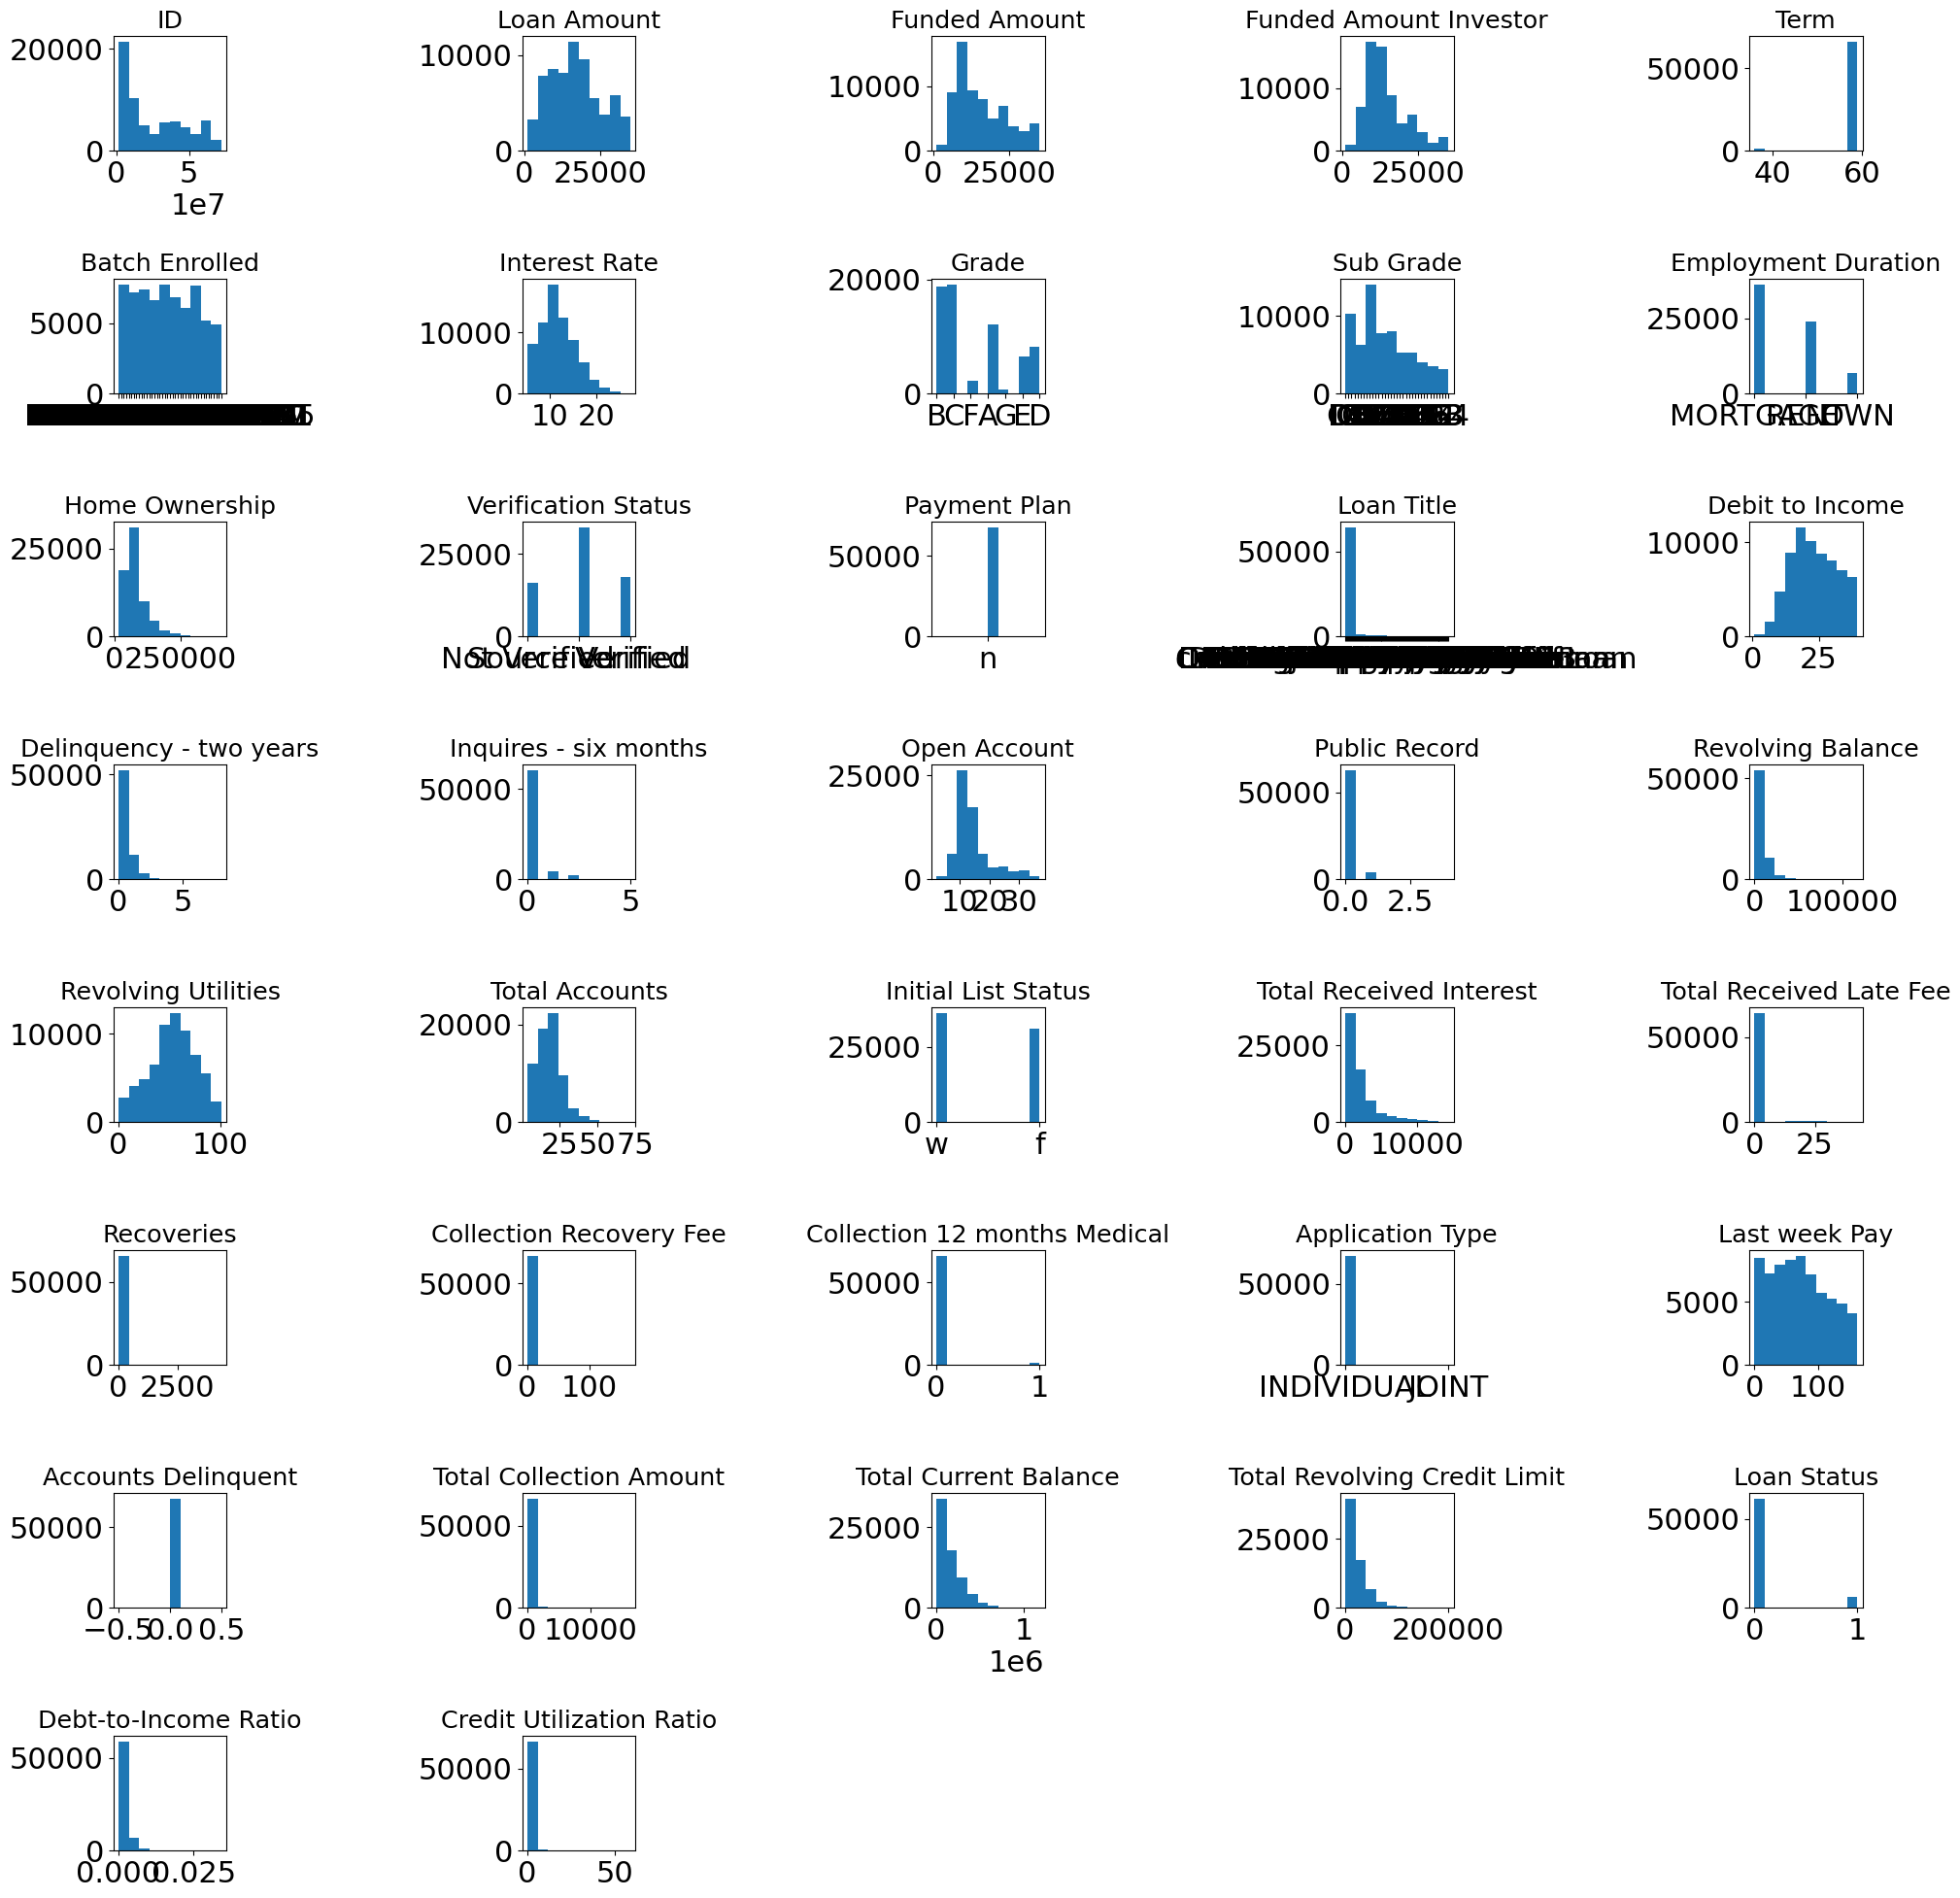

In [110]:


# number of subplots in each row
subplots_per_row = 5
rows = 8

# Calculate the number of subplots in the fourth row
subplots_in_last_row = 40 - (subplots_per_row * (rows - 1))

# Create the grid of subplots
fig, axs = plt.subplots(rows, subplots_per_row, figsize=(20, 20))


axs = axs.flatten()
# Set smaller font size for subplot titles
plt.rcParams['axes.titlesize'] = 'small'
# Plot histograms for each column
for i, column in enumerate(Train.columns):

    row_index = i // subplots_per_row

    # Determine the column index for the subplot
    col_index = i % subplots_per_row

    # Select the appropriate subplot
    if row_index < (rows - 1):
        axs[i].hist(Train[column])
    else:
        if col_index < subplots_in_last_row:
            axs[i].hist(Train[column])

    # Title of sub plot
    axs[i].set_title(column)

    axs[i].set_title(column, fontsize='small')
# Hide empty subplots
for i in range(len(Train.columns), len(axs)):
    axs[i].axis('off')


plt.tight_layout()

plt.show()

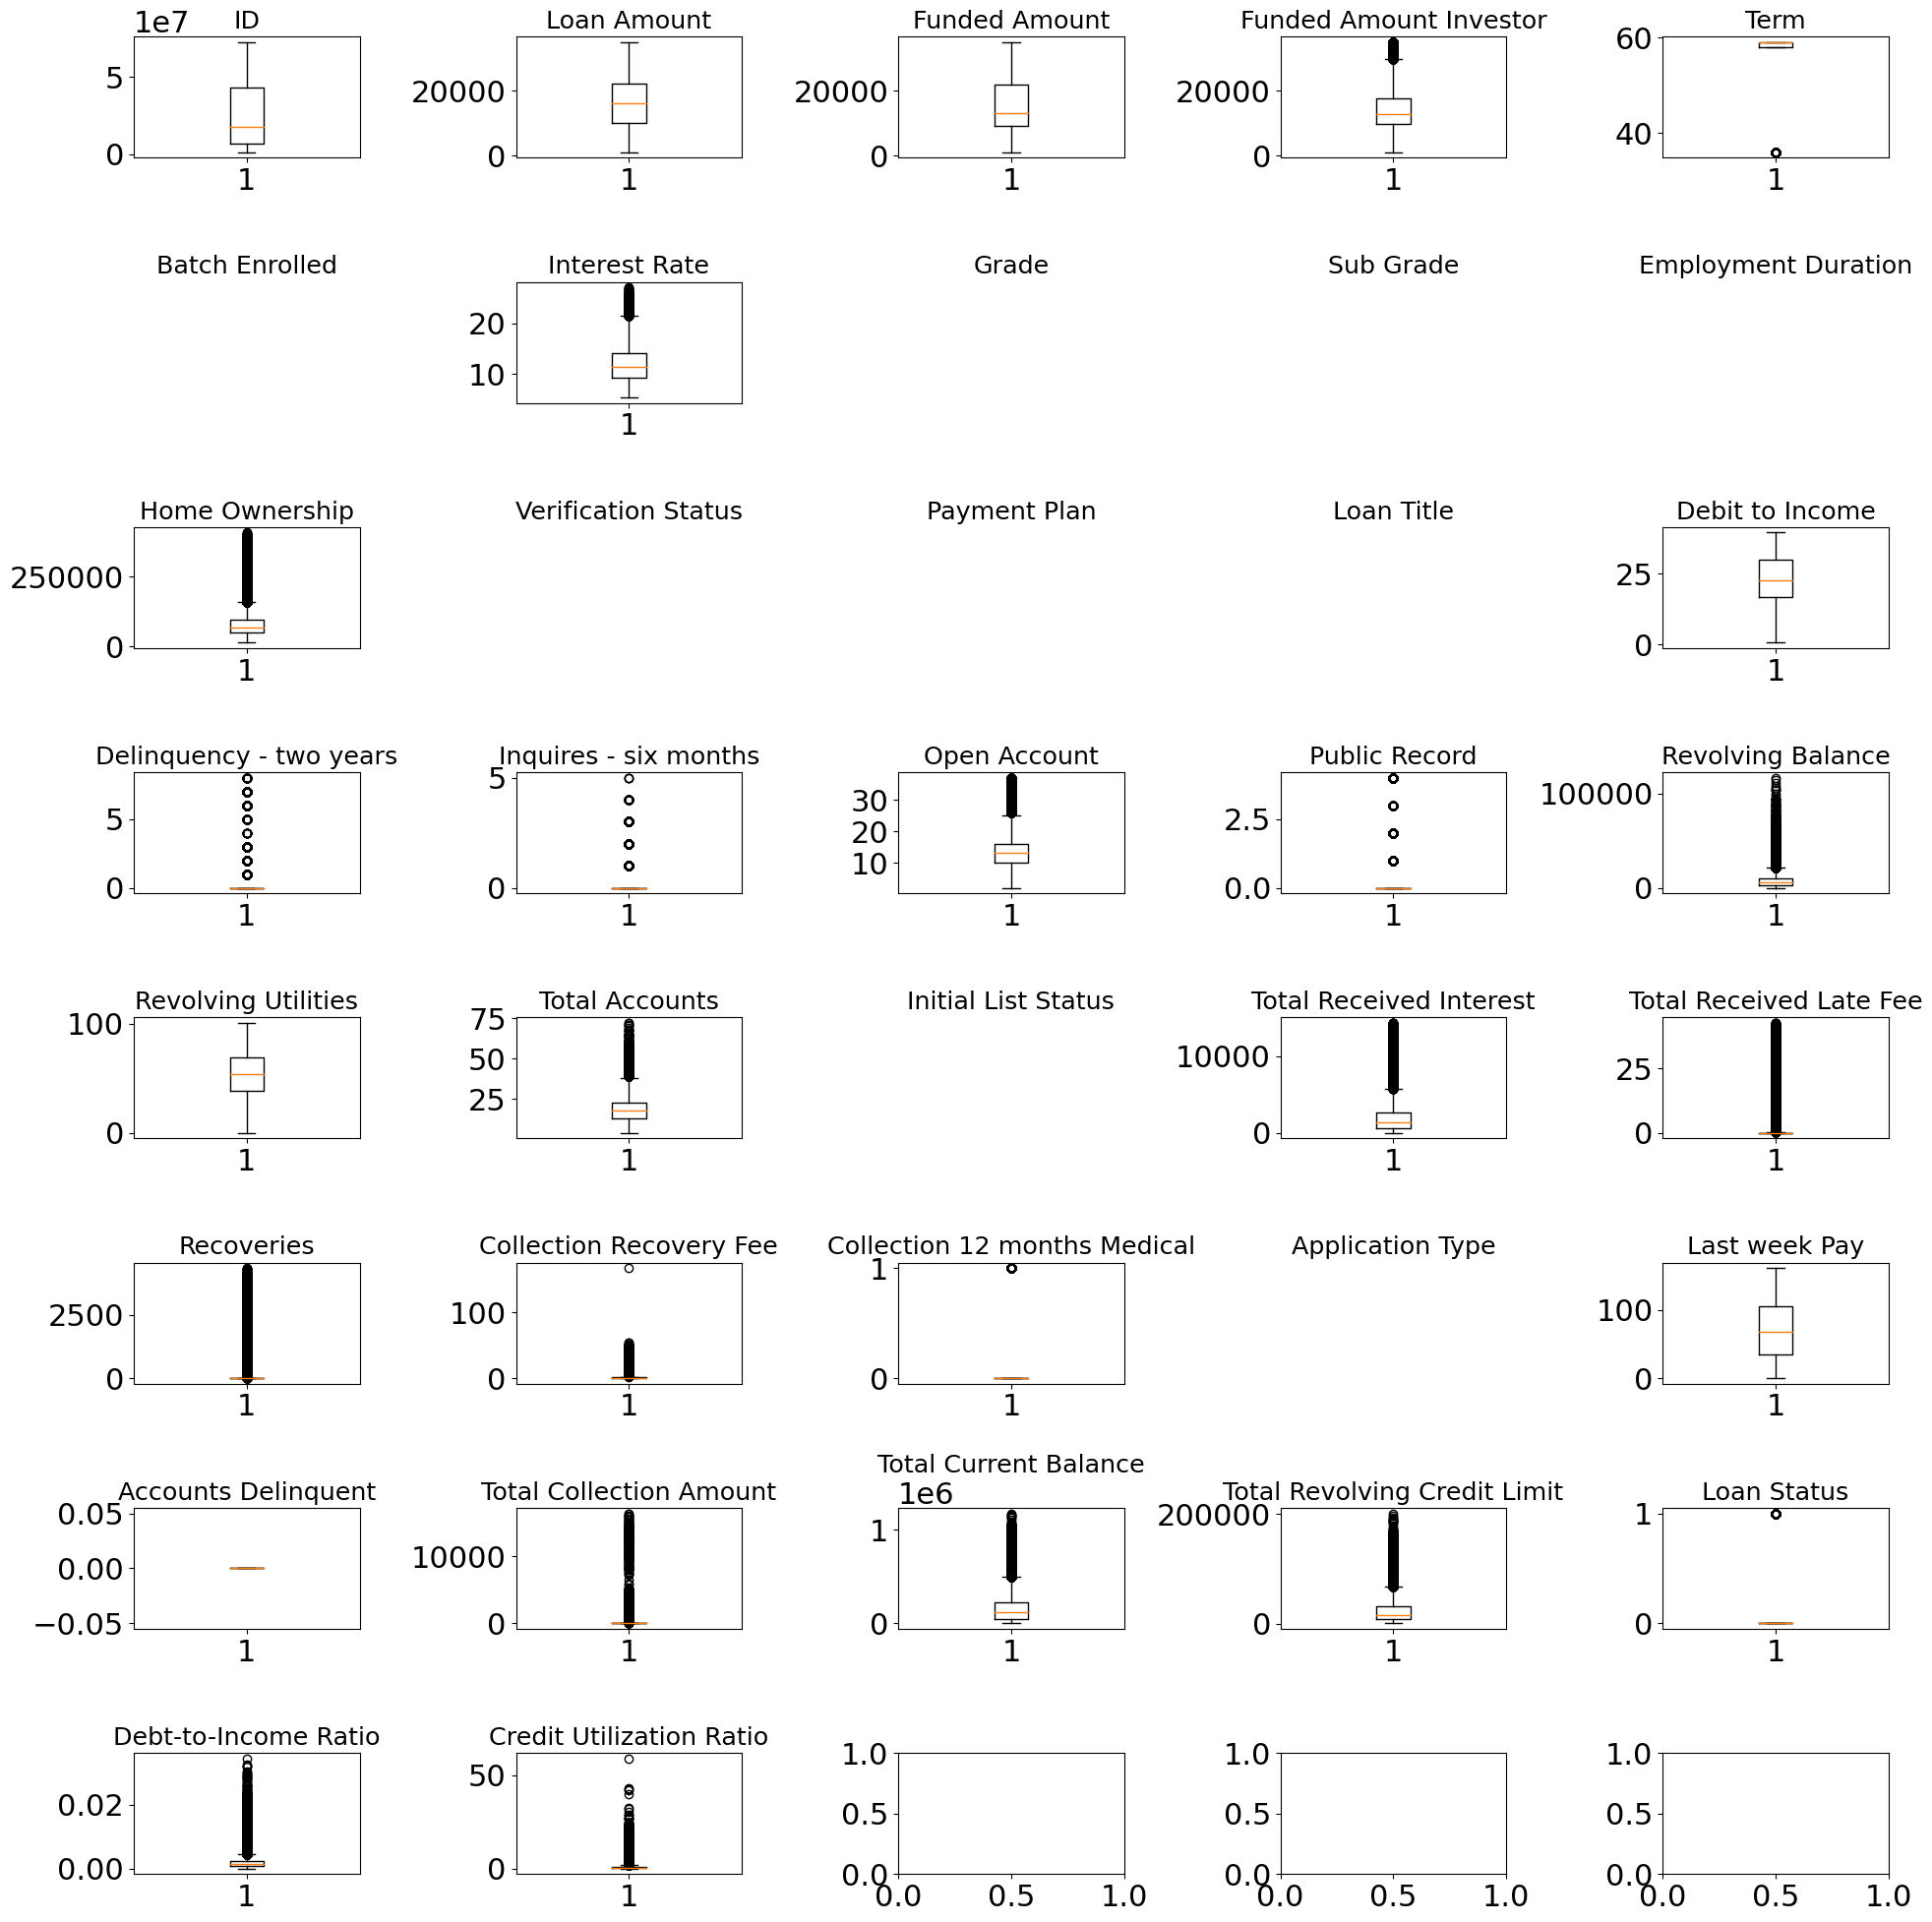

In [111]:

subplots_per_row = 5
rows = 8


subplots_in_last_row = 40 - (subplots_per_row * (rows - 1))

fig, axs = plt.subplots(rows, subplots_per_row, figsize=(20, 20))


axs = axs.flatten()
plt.rcParams['axes.titlesize'] = 'small'
# Plot boxplots for each column
for i, column in enumerate(Train.columns):
    # Determine the row index for the subplot
    row_index = i // subplots_per_row

    # Determine the column index for the subplot
    col_index = i % subplots_per_row

    # Check if the column data type is float or integer
    if Train[column].dtype in [float, int]:
        # Select the appropriate subplot
        if row_index < (rows - 1):
            axs[i].boxplot(Train[column])
        else:
            if col_index < subplots_in_last_row:
                axs[i].boxplot(Train[column])

        # Set the title for the subplot
        axs[i].set_title(column)

    else:
        # Hide empty subplots
        axs[i].axis('off')
    axs[i].set_title(column, fontsize='small')
plt.tight_layout()

plt.show()

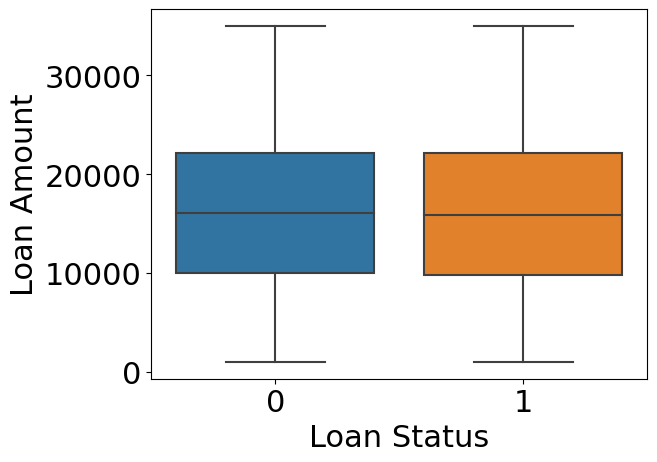

In [112]:
sns.boxplot(x='Loan Status', y='Loan Amount', data=Train)
plt.show()

Cleaning

In [113]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new DataFrame to store the categorical columns
cat_col = pd.DataFrame()
Tranc = Train
# List of categorical columns
categorical_columns = ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
                       'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

# Copy categorical columns from Train to cat_col DataFrame
cat_col[categorical_columns] = Train[categorical_columns]

# Iterate over each categorical column
for column in categorical_columns:
    # Fit LabelEncoder on the column
    label_encoder.fit(cat_col[column])

    # Transform the column values to numerical labels in cat_col DataFrame
    cat_col[column + ' Numeric'] = label_encoder.transform(cat_col[column])
    Tranc[column] = label_encoder.transform(cat_col[column])


cat_col.head()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type,Batch Enrolled Numeric,Grade Numeric,Sub Grade Numeric,Employment Duration Numeric,Verification Status Numeric,Payment Plan Numeric,Loan Title Numeric,Initial List Status Numeric,Application Type Numeric
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL,16,1,13,0,0,0,42,1,0
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL,4,2,17,2,1,0,49,0,0
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL,11,5,18,0,1,0,42,1,0
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL,15,2,12,0,1,0,49,1,0
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL,32,2,18,0,1,0,38,1,0


In [114]:
print(Train['Accounts Delinquent'].value_counts())
print(Train['Payment Plan'].value_counts())

Accounts Delinquent
0    67463
Name: count, dtype: int64
Payment Plan
0    67463
Name: count, dtype: int64


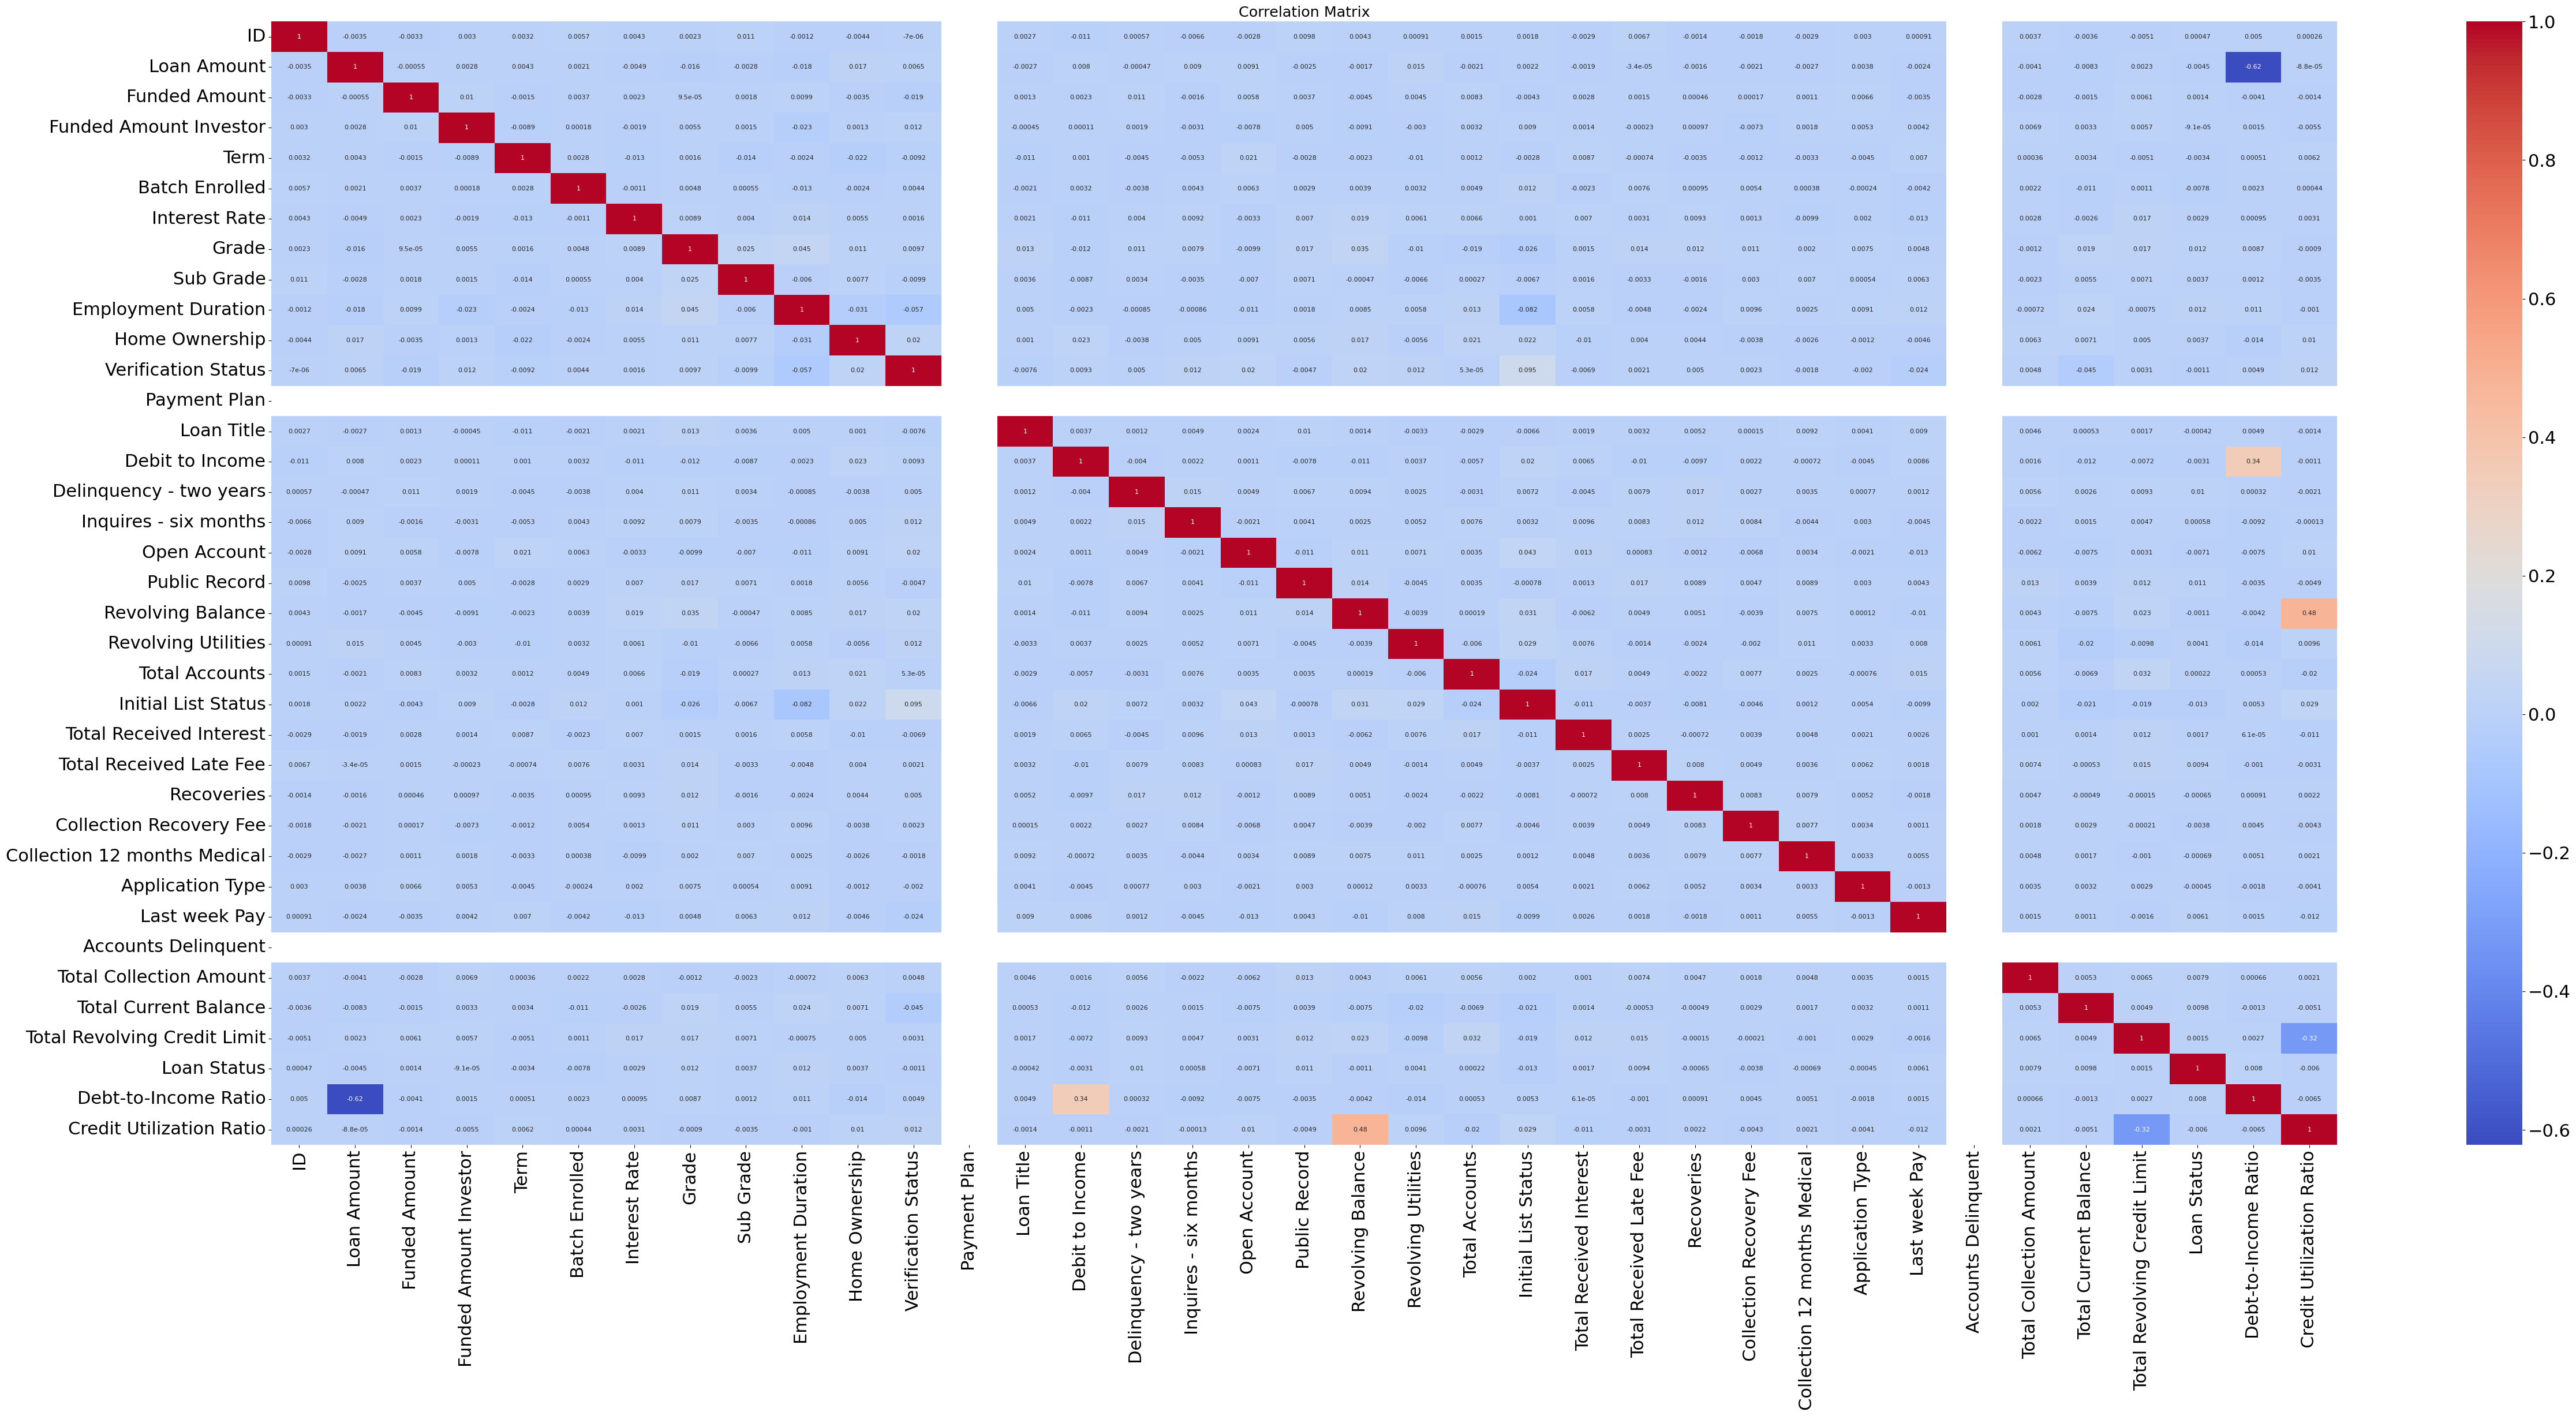

In [116]:
corr_matrix = Tranc.corr()  # Compute correlation matrix
plt.figure(figsize=(50, 25))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            annot_kws={"fontsize": 8})
plt.tight_layout()
plt.show()

In [117]:
Train['Loan Status'].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

In [118]:
Train.drop(['Accounts Delinquent', 'Payment Plan'], axis=1, inplace=True)

Decision Tree

In [119]:
numerical_columns = ['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Interest Rate', 'Total Received Late Fee',
                     'Recoveries', 'Collection Recovery Fee', 'Last week Pay', 'Total Collection Amount',
                     'Total Current Balance', 'Total Revolving Credit Limit', 'Debit to Income',
                     'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record',
                     'Credit Utilization Ratio', 'Debt-to-Income Ratio', 'Revolving Balance',
                     'Revolving Utilities', 'Total Accounts', 'Total Received Interest']

categorical_columns = ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
                       'Verification Status', 'Loan Title', 'Initial List Status',
                       'Application Type', 'Term', 'Collection 12 months Medical']

In [120]:
# Define the preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [121]:


# Separate the features (independent variables) and the target variable
X = Train.drop('Loan Status', axis=1)
y = Train['Loan Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [122]:

# Fit the pipeline on training data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [123]:

# Initialize a decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42, max_features=20)

In [124]:

# Fit the classifier
clf.fit(X_train_transformed, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test_transformed)

In [125]:

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9077299340398726


In [126]:
# Perform k-fold cross-validation and get the accuracy scores
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
scores = cross_val_score(pipeline, X, y, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)

# Print the mean accuracy score
print("Mean accuracy:", scores.mean())

# Print the standard deviation of accuracy scores
print("Standard deviation:", scores.std())

Accuracy scores: [0.90609946 0.90595123 0.9057289  0.90549956 0.90512897]
Mean accuracy: 0.9056816220043074
Standard deviation: 0.000342955079268599


The top-left cell (12244) represents the count of true negatives (TN). These are the instances that are actually negative and were correctly predicted as negative by the model. In this case, there are 12,244 instances correctly classified as negatives.
The top-right cell (31) represents the count of false positives (FP). These are the instances that are actually negative but were incorrectly predicted as positive by the model. In this case, there are 31 instances falsely classified as positives.
The bottom-left cell (1214) represents the count of false negatives (FN). These are the instances that are actually positive but were incorrectly predicted as negative by the model. In this case, there are 1,214 instances falsely classified as negatives.
The bottom-right cell (4) represents the count of true positives (TP). These are the instances that are actually positive and were correctly predicted as positive by the model. In this case, there are 4 instances correctly classified as positives.

Confusion Matrix:
[[12244    31]
 [ 1214     4]]


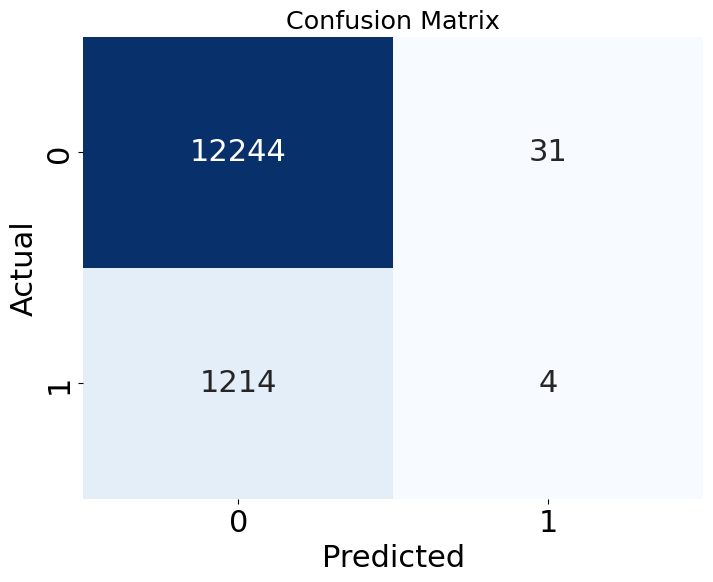

In [127]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
predicted_probabilities = clf.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
auc_score = auc(fpr, tpr)

An AUC (Area Under the Curve) score of 0.5 represents a classifier with a random or no better than random performance in distinguishing between the positive and negative classes. The AUC score is a metric used to evaluate the performance of a binary classification model based on its ROC (Receiver Operating Characteristic) curve

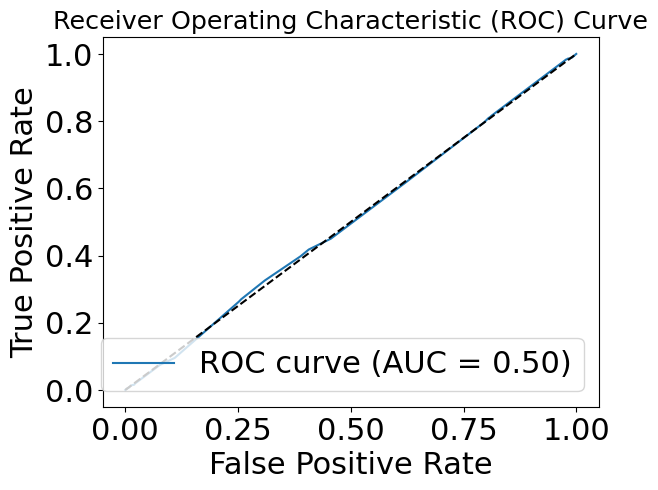

In [130]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The model has a hard time predicting negative outcomes. It could be to because of the lack of Negative data provided

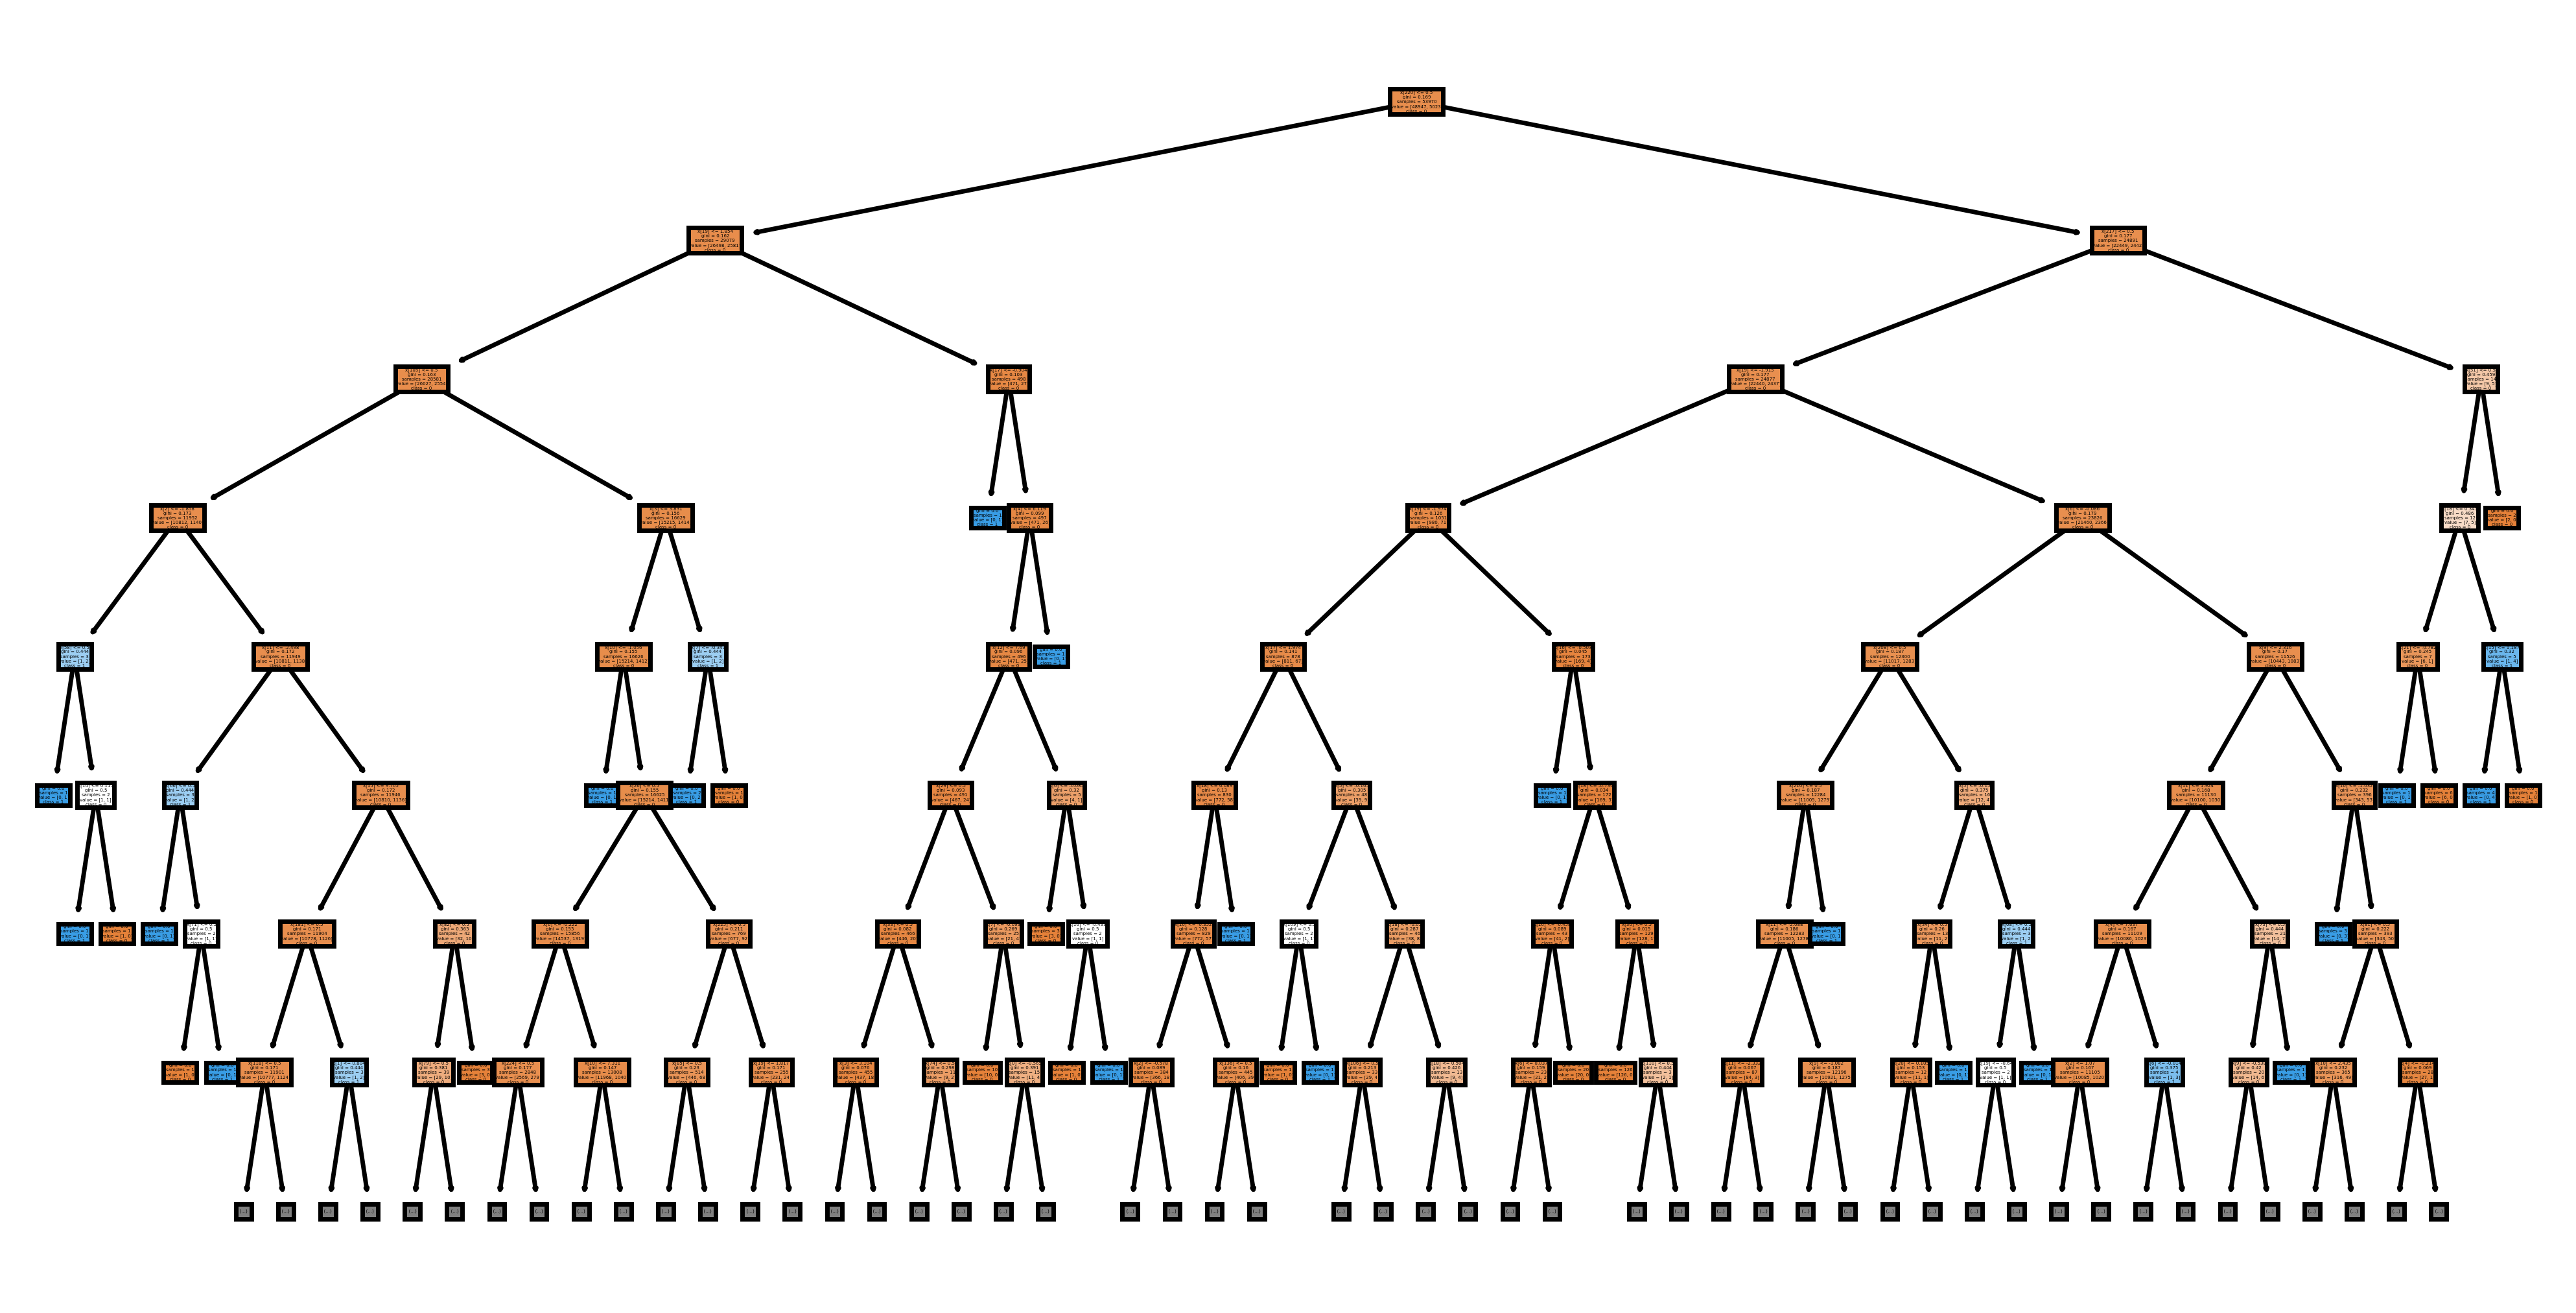

In [131]:
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=500)
tree.plot_tree(clf,
               max_depth=7,
               class_names=['0', '1'],
               filled=True)
fig.savefig('tree1.png')

Logistic Regression

In [132]:
#  preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [133]:


pipeline = Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

In [134]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga', 'lbfgs']
}

In [135]:
# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/tutudaranijo/Downloads/Github_projects/Python_Project/Loan_Deafult/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tutudaranijo/Downloads/Github_projects/Python_Project/Loan_Deafult/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/tutudaranijo/Downloads/Github_projects/Python_Project/Loan_Deafult/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/tutudaranijo/Downloads/Github_projects/Python_Project/Loan_Deafult/.venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/Users/tutudaranijo/Downloads/Github_projects/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Loan '
                                                                          'Amount',
                                                                          'Funded '
                                                                          'Amount',
                                                                          'Funded '
                                                                          'Amount '
                                                                          'Investor',
                                                                          'Interest '
                                                                          'Rate',
                                                                          'Total '
                                                                          'Received '
                                                                          'Late '
                                                                          'Fee',
                                                                          'Recoveries',
                                                                          'Collection '
                                                                          'Recovery '
                                                                          'Fee',
                                                                          'Last '
                                                                          'week '
                                                                          'Pay',
                                                                          'Total '
                                                                          'Collection '
                                                                          'Amount',
                                                                          'Total '
                                                                          'Current '
                                                                          'Balance',
                                                                          'Total '
                                                                          'Revolvi...
                                                                          'Interest']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Batch '
                                                                          'Enrolled',
                                                                          'Grade',
                                                                          'Sub '
                                                                          'Grade',
                                                                          'Employment '
                                                                          'Duration',
                                                                          'Verification '
                                                                          'Status',
                                                                          'Loan '
                                                                          'Title',
                                                                          'Initial '
                                                                          'List '
                                               

In [136]:

# Get the best estimator and predict the target variable for the test data
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

An AUC (Area Under the Curve) score of 0.5 represents a classifier that has a random or no better than random performance in distinguishing between the positive and negative classes. The AUC score is a metric used to evaluate the performance of a binary classification model based on its ROC (Receiver Operating Characteristic) curve.

When the AUC score is 0.5, it indicates that the model's predictions are essentially the same as random chance. The ROC curve will be a diagonal line, which suggests that the model cannot effectively differentiate between the positive and negative classes.

AUC scores have a range from 0 to 1, where a score of 0.5 represents a poor classifier, while a score of 1 indicates a perfect classifier. A higher AUC score signifies better performance in distinguishing between the positive and negative classes.

AUC score: 0.5
AUC score with best threshold: 0.5319551934826884


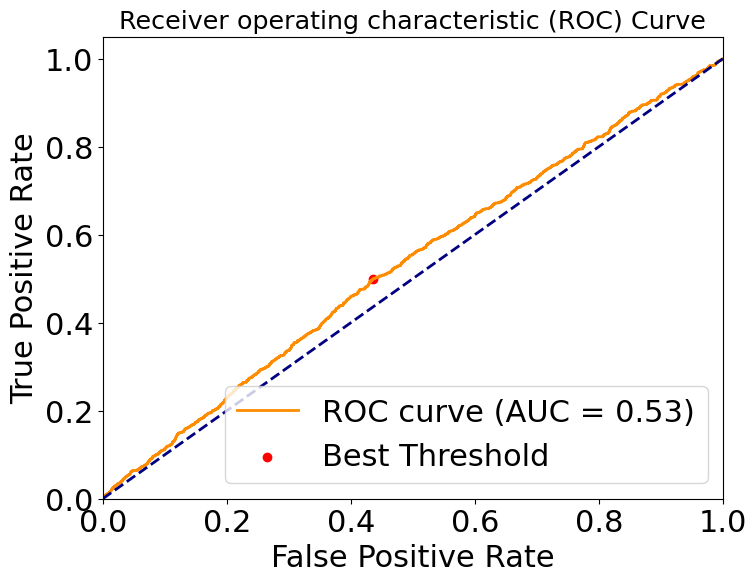

In [137]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC score: {auc_score}")

# Predict the probabilities for each class
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Find the best threshold based on maximizing the Youden's J statistic
Youden_J = tpr - fpr
best_threshold = thresholds[np.argmax(Youden_J)]

# Apply the best threshold to convert probabilities to binary predictions
y_pred_best = np.where(y_pred_prob >= best_threshold, 1, 0)

# Calculate the new AUC score with the best threshold
auc_score_best = roc_auc_score(y_test, y_pred_best)
print(f"AUC score with best threshold: {auc_score_best}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[np.argmax(Youden_J)], tpr[np.argmax(Youden_J)],
            color='red', label='Best Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The top-left cell (12275) represents the count of true negatives (TN). These are the instances that are actually negative and were correctly predicted as negative by the model. In this case, there are 12,275 instances correctly classified as negatives.
The top-right cell (0) represents the count of false positives (FP). These are the instances that are actually negative but were incorrectly predicted as positive by the model. In this case, there are no instances falsely classified as positives.
The bottom-left cell (1218) represents the count of false negatives (FN). These are the instances that are actually positive but were incorrectly predicted as negative by the model. In this case, there are 1,218 instances falsely classified as negatives.
The bottom-right cell (0) represents the count of true positives (TP). These are the instances that are actually positive and were correctly predicted as positive by the model. In this case, there are no instances correctly classified as positives.

Confusion Matrix:
[[12275     0]
 [ 1218     0]]


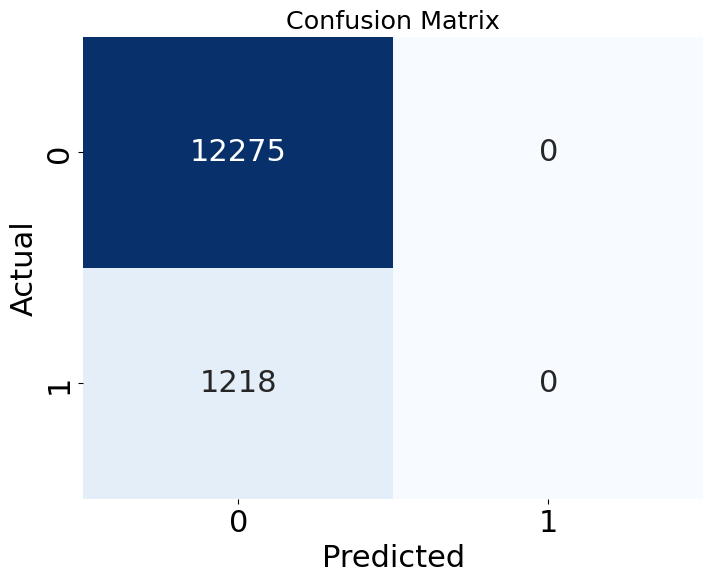

In [138]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Neural Network

In [140]:
Train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Debt-to-Income Ratio,Credit Utilization Ratio
0,65087372,10000,32236,12329.36286,59,16,11.135007,1,13,0,...,0.793724,0,0,49,31,311301,6619,0,0.001628,3.663091
1,1450153,3609,11940,12191.99692,59,4,12.237563,2,17,2,...,0.974821,0,0,109,53,182610,20885,0,0.004271,0.038880
2,1969101,28276,9311,21603.22455,59,11,12.545884,5,18,0,...,1.020075,0,0,66,34,89801,26155,0,0.000995,0.070465
3,6651430,11170,6954,17877.15585,59,15,16.731201,2,12,0,...,0.749971,0,0,39,40,9189,60214,0,0.001615,0.229498
4,14354669,16890,13226,13539.92667,59,32,15.008300,2,18,0,...,0.368953,0,0,18,430,126029,22579,0,0.001019,0.068382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,21,9.408858,2,3,0,...,0.865230,0,0,69,48,181775,34301,1,0.002066,0.119880
67459,35182714,8323,11046,15637.46301,59,7,9.972104,2,7,2,...,1.403368,0,0,14,37,22692,8714,0,0.002126,1.117397
67460,16435904,15897,32921,12329.45775,59,5,19.650943,0,27,0,...,1.607093,0,0,137,17,176857,42330,0,0.000648,0.051854
67461,5300325,16567,4975,21353.68465,59,14,13.169095,3,22,1,...,0.207608,0,0,73,61,361339,39075,0,0.000460,0.029994


In [141]:
# Define the preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])


# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [142]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X)

Acc = []

In [143]:
# Initialize the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Acc = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the neural network model
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation='relu',
              input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Preprocess the training and testing data using the pipeline
    X_train_scaled = pipeline.fit_transform(X_train).toarray()
    X_test_scaled = pipeline.transform(X_test).toarray()

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=10,
                        batch_size=32, validation_data=(X_test_scaled, y_test))

    # Predict the target variable for the test data
    y_pred = model.predict(X_test_scaled)

    # accuracy
    acc = accuracy_score(y_test, (y_pred > 0.5))
    Acc.append(acc)

    # confusion matrix
    cm = confusion_matrix(y_test, (y_pred > 0.5))
    confusion_matrices.append(cm)

    # Print the accuracy for each fold
    print("Accuracy:", acc)

# Print the average accuracy across all folds
print("Average Accuracy:", sum(Acc) / len(Acc))

Epoch 1/10
1687/1687 [==============================] - 12s 5ms/step - loss: 0.3149 - accuracy: 0.9067 - val_loss: 0.3040 - val_accuracy: 0.9097
Epoch 2/10
1687/1687 [==============================] - 10s 6ms/step - loss: 0.3096 - accuracy: 0.9069 - val_loss: 0.3043 - val_accuracy: 0.9097
Epoch 3/10
1687/1687 [==============================] - 7s 4ms/step - loss: 0.3073 - accuracy: 0.9069 - val_loss: 0.3058 - val_accuracy: 0.9097
Epoch 4/10
1687/1687 [==============================] - 14s 8ms/step - loss: 0.3034 - accuracy: 0.9069 - val_loss: 0.3100 - val_accuracy: 0.9097
Epoch 5/10
1687/1687 [==============================] - 14s 8ms/step - loss: 0.2980 - accuracy: 0.9070 - val_loss: 0.3100 - val_accuracy: 0.9097
Epoch 6/10
1687/1687 [==============================] - 9s 5ms/step - loss: 0.2918 - accuracy: 0.9071 - val_loss: 0.3175 - val_accuracy: 0.9095
Epoch 7/10
1687/1687 [==============================] - 8s 5ms/step - loss: 0.2857 - accuracy: 0.9072 - val_loss: 0.3230 - val_accur

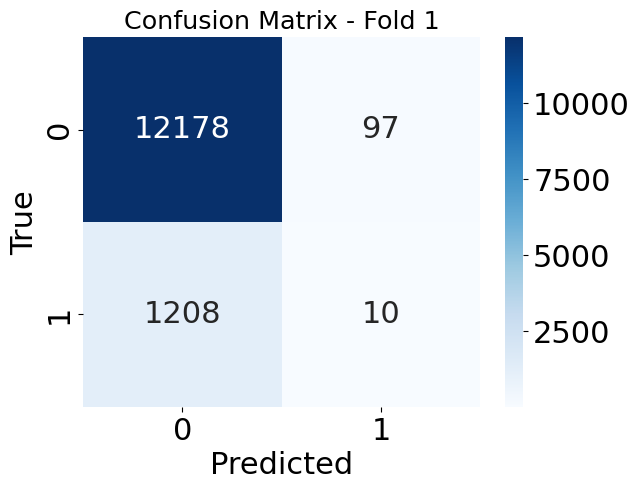

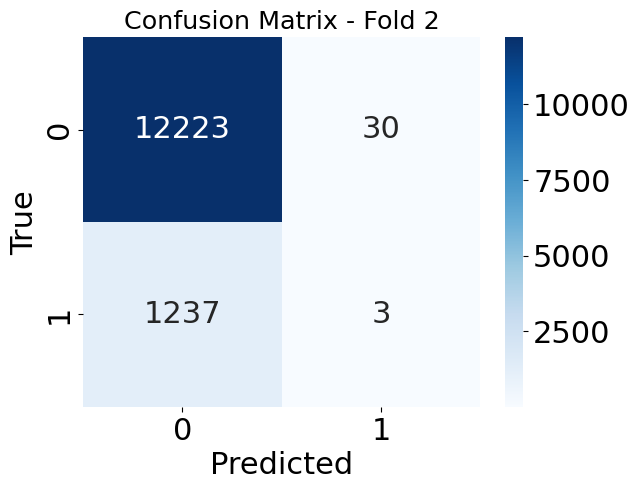

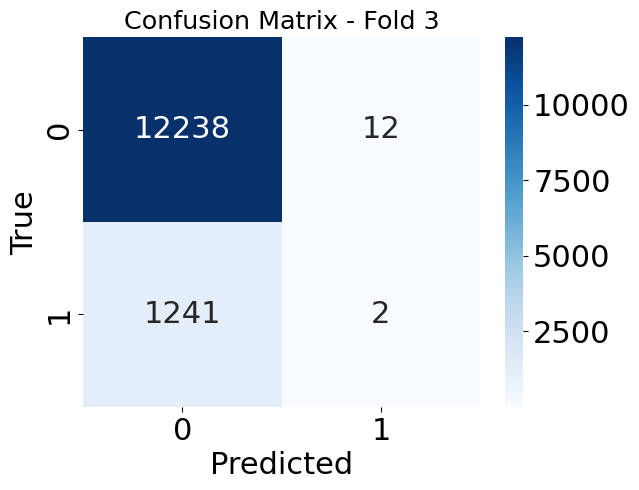

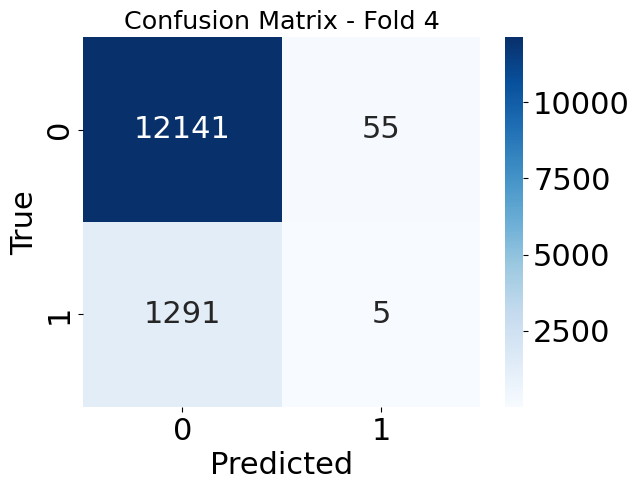

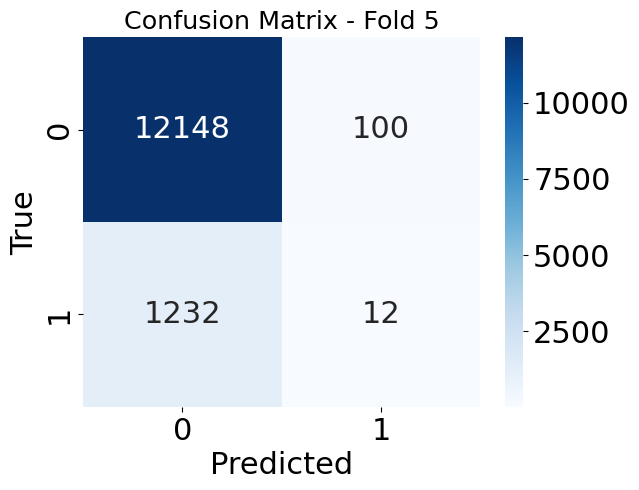

In [144]:
# Plot the confusion matrices
for i, cm in enumerate(confusion_matrices):
    plt.figure()
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - Fold {i+1}')
    class_labels = [0, 1]
    ax.xaxis.set_ticklabels(class_labels)
    ax.yaxis.set_ticklabels(class_labels)
    plt.show()

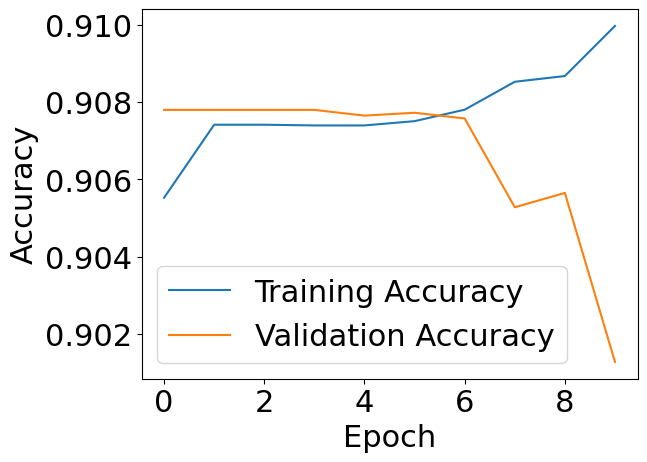

In [145]:

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()